In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

In [8]:
df = pd.read_csv("../output/all_losses_ssize800_220617-0936.csv", index_col="idx")

In [9]:
df.head()

,model,dataset,l1,l2,l3
idx,,,,,
0,4,mocap,0.117926,0.171222,0.171222
1,4,mocap,0.208099,0.375412,0.375412
2,4,mocap,0.211874,0.377965,0.377965
3,4,mocap,0.132784,0.284693,0.284693
4,4,mocap,0.196964,0.292098,0.292098


In [53]:
df_agg = df.melt(["model", "dataset"], var_name="loss").groupby(["model", "dataset", "loss"]).agg({"value": [np.mean, np.min, np.max]}).reset_index().droplevel(0, "columns")
df_agg.columns = ["train_iter", "dataset", "loss", "mean", "amin", "amax"]

In [54]:
df_agg

,train_iter,dataset,loss,mean,amin,amax
0,4,mocap,l1,0.169921,0.054206,0.742927
1,4,mocap,l2,0.282731,0.109643,1.038511
2,4,mocap,l3,0.282731,0.109643,1.038511
3,4,mupots,l1,0.105428,0.043434,0.216069
4,4,mupots,l2,0.193143,0.077659,0.336401
...,...,...,...,...,...,...
175,99,mupots,l2,0.194152,0.078636,0.524939
176,99,mupots,l3,0.194152,0.078636,0.524939
177,99,train_mocap,l1,0.090713,0.039476,0.218960
178,99,train_mocap,l2,0.147107,0.058076,0.356842


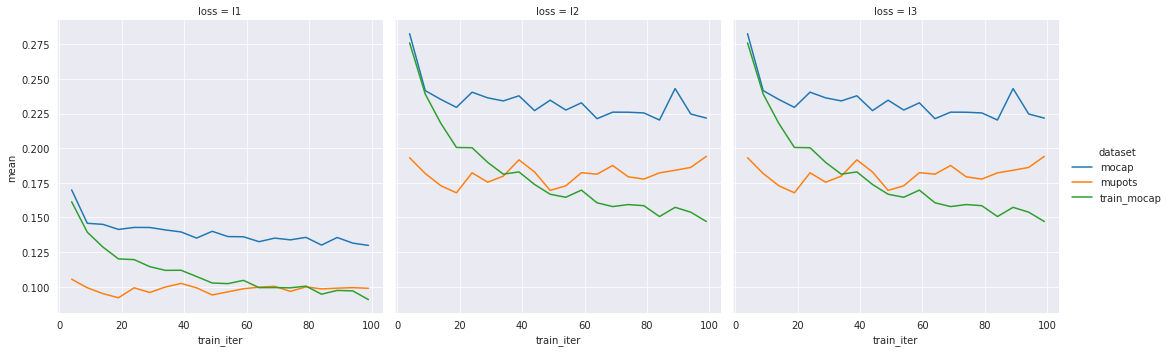

In [55]:
g = sns.FacetGrid(df_agg, col="loss", hue="dataset", height=5)
g.map(sns.lineplot, "train_iter", "mean")
g.add_legend()

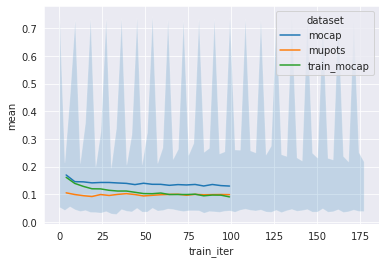

In [57]:
data = df_agg[df_agg.loss=="l1"]
ax = sns.lineplot(data=data, x="train_iter", y="mean", hue="dataset")
ax.fill_between(data.index, data.amin, data.amax, alpha=.2)

array([<AxesSubplot:xlabel='model'>, <AxesSubplot:xlabel='model'>,
       <AxesSubplot:xlabel='model'>], dtype=object)

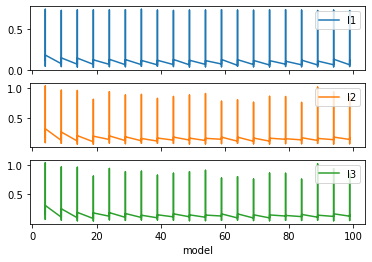

In [17]:
df.plot(x="model", kind="line", subplots=True)